In [1]:
import os, sys

import numpy as np
from scipy.linalg import eigh
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
import scipy.linalg as sla
import pandas as pd
import numpy as np
from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import optimize
from scipy.optimize import minimize
from astropy.io import fits
from astropy import wcs
from matplotlib import cm
from matplotlib.colors import LogNorm

import warnings
warnings.filterwarnings('ignore')

%matplotlib notebook
# %matplotlib inline
# %matplotlib widget
# %matplotlib ipympl

In [2]:
pysbf_path = "/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/"
sys.path.insert(0, pysbf_path)
from pysbf import *

In [3]:
X0 = 563     # Object Center X0 [pixel]
Y0 = 563     # Object Center Y0 [pixel]

galaxy_name = "u03396"
inFolder = '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/wfc3-16262/'

version = "sej"

PRF = "Outputs_u03396/model.000"
RSD = "Outputs_u03396/resid.000"

PTM = inFolder+"u03396/u03396sej.ptm6b"  # point source mask, comes from likenew6 (tuned for infrared bands)
# ptm6 default output of likenew: sometimes misses objects that are super bright
# ptm6b --> produced after further manipulations

## not different by a lot
## model pswf --> blur psf
## trying multiple psf --> averaging out the results, or using them for error measuremnt
## combinedj.on.bright.psf.14219 sharpest one, good starting 
## PSFstd --> mode l psf from space teelscope
# PSF = inFolder+"/psflibrary/PSFSTD_WFC3IR_F110W.fits"
PSF = inFolder+"/psflibrary/combinedj.on.psf.14654"

KS0 = 25
KS1 = 60

# PSF = 
psforder = 4
psfk0 = 0
psfk1 = 15



<IPython.core.display.Javascript object>


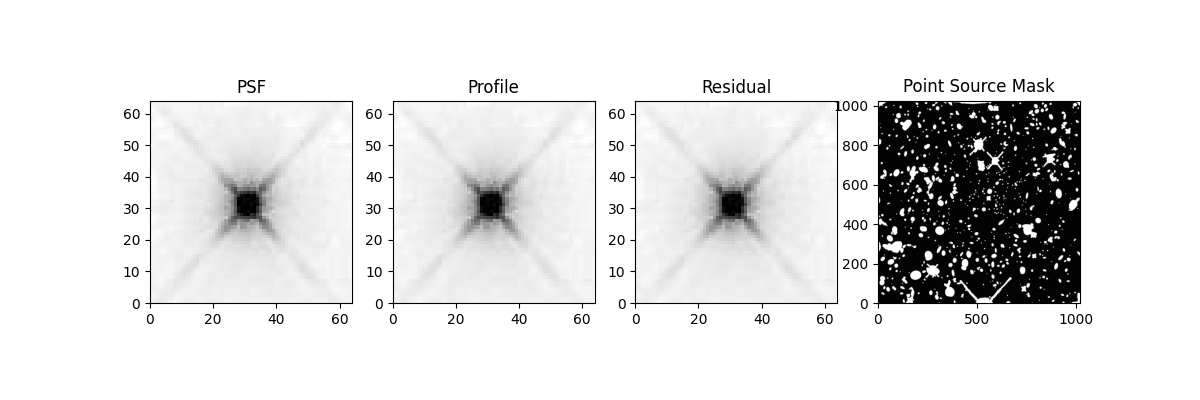

===== MONSTA =====
   1
   2    rd 1 'Outputs_u03396/model.000'
   3    tv 1 sqrt JPEG=tv.jpg
   4    q
   5
   6    
 Can't open file Outputs_u03396/model.000
 Error at line   2:      rd 1 'Outputs_u03396/model.000'
 Subroutine stack   Line number:
 VISTA                                                 0
 ./tv.pro                                              2
 >> 
===== MONSTA =====
   1
   2    rd 1 'Outputs_u03396/resid.000'
   3    tv 1  JPEG=tv.jpg
   4    q
   5
   6    
 Can't open file Outputs_u03396/resid.000
 Error at line   2:      rd 1 'Outputs_u03396/resid.000'
 Subroutine stack   Line number:
 VISTA                                                 0
 ./tv.pro                                              2
 >> 


Text(0.5, 1.0, 'Point Source Mask')

In [4]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12,4))

tv(PSF, ax=ax1, options="sqrt"); ax1.set_title("PSF")
tv(PRF, ax=ax2, options="sqrt"); ax2.set_title("Profile")
tv(RSD, ax=ax3); ax3.set_title("Residual")
tv(PTM, ax=ax4); ax4.set_title("Point Source Mask")

```string name '{arg2}'      ! galaxy name
string version '{arg3}'   ! sej or doj   ---for  dophot sextractor
string X0 '{arg4}'        ! center
string Y0 '{arg5}'
string KS0 '{arg6}'       ! fit wave fumbers  ~25
string KS1 '{arg7}'       ! ~ 60
string PSF '{arg8}'       ! name of the PSF files
string psforder '{arg9}'  ! usually 4th order fit 
string psfk0 '0'          ! same as wavenumbers  ~0
string psfk1 '{arga}'     ! ~10-20
string OK 'N'             ! 
printf '{name},{PSF}'```

In [13]:
r0 = 32
r1 = 64
a0 = 0
a1 = 360

monsta_script = """

    rd 1 '"""+str(PSF)+"""'                   ! reading psf from library
    rd 2 '"""+str(PRF)+"""'                   ! eliprof final model
    rd 3 '"""+str(RSD)+"""'                   ! galaxy subtracted residual
    rd 5 '"""+str(PTM)+"""' bitmap            ! hybrid point source mask  (dophot+sextractor)
    mi 3 5

    cop 4 1
    open 6 nr=512 nc=512
    fluc 6 5 mask x0="""+str(X0)+""" y0="""+str(Y0)+""" r0="""+str(r0)+""" r1="""+str(r1)+""" a0="""+str(a0)+""" a1="""+str(a1)+""" ! c0     taking the donut shape and putting the mask
    cop 7 6
    mi 7 3
    tv 7
    fluc 6 2 window         ! taking the fft of the mask multiply by the sqrt of the galaxy profile 
    fluc 6 4 expect order="""+str(psforder)+""" k0="""+str(psfk0)+""" k1="""+str(psfk1)+"""   ! expectation power spectrum for psf  0->20
    fft 8 7
    power 4 8
    fluc 6 4 fit ks0="""+str(KS0)+""" ks1="""+str(KS1)+""" plot   ! 6:expectation opower spectrum   4:the power spectrum of data   ks: the power range
    print fluc file=test.c0     

"""


run_monsta(monsta_script, 'monsta.pro', 'monsta.log')

'OK'